## Funciones auxiliares y librerías

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Carga de datos
def load_dataset():
 (trainX, trainY), (testX, testY) = cifar10.load_data()
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

# Graficar histórico
def plot_history(history, title):
  _, axs = plt.subplots(2, 1)
  axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
  axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
  axs[0].set_ylabel(r"Loss")
  axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
  axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
  axs[1].set_ylabel(r"Accuracy")
  axs[0].legend(["train", "validation"], loc = "upper right")
  axs[1].set_xlabel("Epochs")
  plt.suptitle(title)
  plt.show()

## Primer experimento

In [ ]:
modelv1 = Sequential()

modelv1.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelv1.add(MaxPooling2D(pool_size = (2, 2)))

modelv1.add(Flatten())
modelv1.add(Dense(128, activation = 'relu'))
modelv1.add(Dense(10, activation = 'softmax'))

#modelv1.summary()

modelv1.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

Epoch 1/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.5923 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 2/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3029 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 5/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 6/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3032 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3027 - val_ac

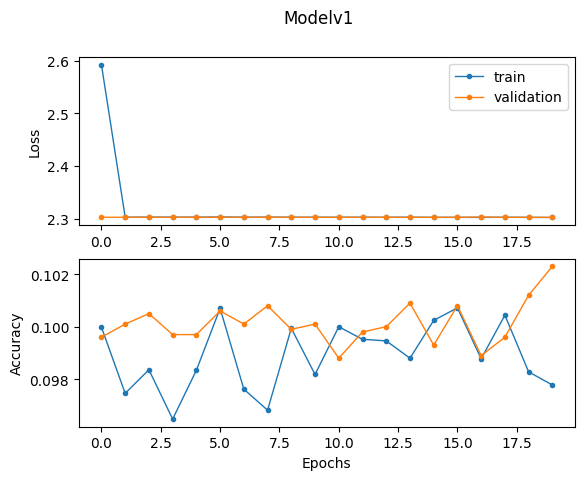

> 10.230


In [ ]:
trainX, trainY, testX, testY = load_dataset()
history_modelv1 = modelv1.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv1, 'Modelv1')
_, acc = modelv1.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

## Segundo experimento

### Segunda versión del modelo

In [ ]:
modelv2 = Sequential()

modelv2.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelv2.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
modelv2.add(MaxPooling2D(pool_size = (2, 2)))

modelv2.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv2.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv2.add(MaxPooling2D((2, 2)))

modelv2.add(Flatten())
modelv2.add(Dense(128, activation = 'relu'))
modelv2.add(Dense(10, activation = 'softmax'))

#modelv2.summary()

modelv2.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

Epoch 1/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.3339 - accuracy: 0.0981 - val_loss: 2.3023 - val_accuracy: 0.1035
Epoch 2/20
3125/3125 [==============================] - 15s 5ms/step - loss: 2.0084 - accuracy: 0.2541 - val_loss: 1.7605 - val_accuracy: 0.3658
Epoch 3/20
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5250 - accuracy: 0.4536 - val_loss: 1.3890 - val_accuracy: 0.5089
Epoch 4/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.3033 - accuracy: 0.5426 - val_loss: 1.2619 - val_accuracy: 0.5499
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.1776 - accuracy: 0.5900 - val_loss: 1.2089 - val_accuracy: 0.5784
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0835 - accuracy: 0.6209 - val_loss: 1.1530 - val_accuracy: 0.6142
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0088 - accuracy: 0.6478 - val_loss: 1.1749 - val_ac

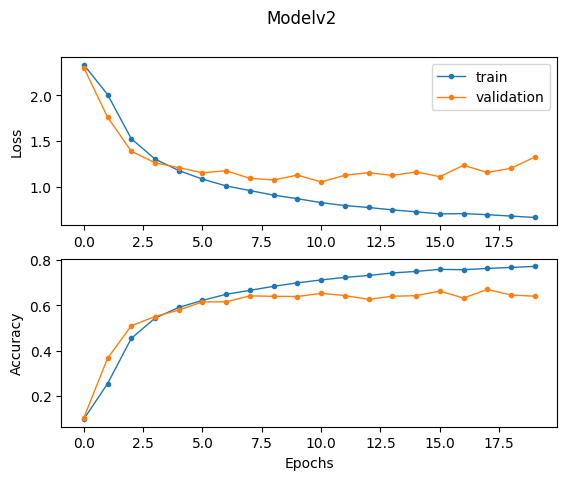

> 63.940


In [ ]:
trainX, trainY, testX, testY = load_dataset()
history_modelv2 = modelv2.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv2, 'Modelv2')
_, acc = modelv2.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

### Tercera versión del modelo

In [ ]:
modelv3 = Sequential()

modelv3.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelv3.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
modelv3.add(MaxPooling2D(pool_size = (2, 2)))
modelv3.add(Dropout(0.2))

modelv3.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv3.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv3.add(MaxPooling2D((2, 2)))
modelv3.add(Dropout(0.2))

modelv3.add(Flatten())
modelv3.add(Dense(128, activation = 'relu'))
modelv3.add(Dropout(0.2))
modelv3.add(Dense(10, activation = 'softmax'))

#modelv3.summary()

modelv3.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

Epoch 1/20
3125/3125 [==============================] - 18s 5ms/step - loss: 2.3363 - accuracy: 0.0994 - val_loss: 2.3021 - val_accuracy: 0.1045
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.1707 - accuracy: 0.1773 - val_loss: 1.8515 - val_accuracy: 0.3073
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.8160 - accuracy: 0.3235 - val_loss: 1.7299 - val_accuracy: 0.3736
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6740 - accuracy: 0.3845 - val_loss: 1.5883 - val_accuracy: 0.4137
Epoch 5/20
3125/3125 [==============================] - 17s 6ms/step - loss: 1.6072 - accuracy: 0.4088 - val_loss: 1.4265 - val_accuracy: 0.4832
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.5482 - accuracy: 0.4368 - val_loss: 1.4902 - val_accuracy: 0.4651
Epoch 7/20
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4933 - accuracy: 0.4575 - val_loss: 1.3519 - val_ac

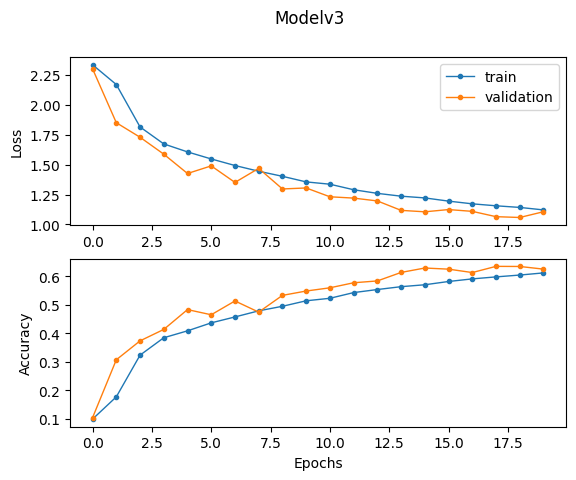

> 62.510


In [ ]:
trainX, trainY, testX, testY = load_dataset()
history_modelv3 = modelv3.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv3, 'Modelv3')
_, acc = modelv3.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

### Cuarta versión del modelo

In [ ]:
modelv4 = Sequential()

modelv4.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelv4.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
modelv4.add(MaxPooling2D(pool_size = (2, 2)))
modelv4.add(Dropout(0.2))

modelv4.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
modelv4.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
modelv4.add(MaxPooling2D((2, 2)))
modelv4.add(Dropout(0.2))

modelv4.add(Flatten())
modelv4.add(Dense(128, activation = 'relu'))
modelv4.add(Dropout(0.2))
modelv4.add(Dense(10, activation = 'softmax'))

#modelv4.summary()

modelv4.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

Epoch 1/20
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3450 - accuracy: 0.1092 - val_loss: 2.2447 - val_accuracy: 0.1755
Epoch 2/20
3125/3125 [==============================] - 15s 5ms/step - loss: 2.0642 - accuracy: 0.2449 - val_loss: 1.7540 - val_accuracy: 0.3648
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7813 - accuracy: 0.3508 - val_loss: 1.6977 - val_accuracy: 0.4009
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6827 - accuracy: 0.3933 - val_loss: 1.5542 - val_accuracy: 0.4536
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6129 - accuracy: 0.4197 - val_loss: 1.4970 - val_accuracy: 0.4649
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.5450 - accuracy: 0.4491 - val_loss: 1.5089 - val_accuracy: 0.4591
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 1.4891 - accuracy: 0.4727 - val_loss: 1.4445 - val_ac

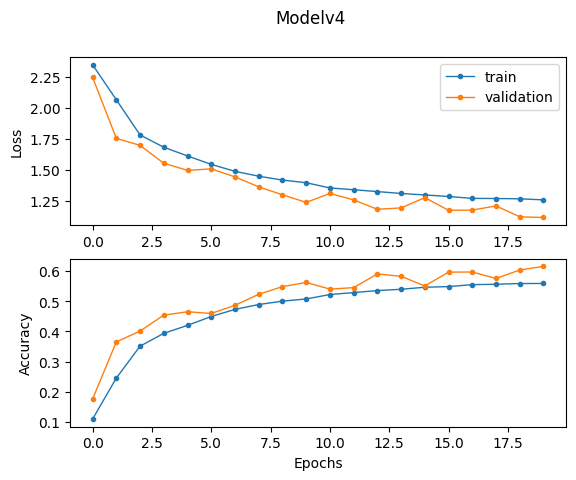

> 61.530


In [ ]:
trainX, trainY, testX, testY = load_dataset()
history_modelv4 = modelv4.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv4, 'Modelv4')
_, acc = modelv4.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

### Quinta versión del modelo

In [ ]:
modelv5 = Sequential()

modelv5.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelv5.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
modelv5.add(MaxPooling2D(pool_size = (2, 2)))
modelv5.add(Dropout(0.2))

modelv5.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv5.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
modelv5.add(MaxPooling2D((2, 2)))
modelv5.add(Dropout(0.2))

modelv5.add(Flatten())
modelv5.add(Dense(128, activation = 'relu'))
modelv5.add(Dropout(0.2))
modelv5.add(Dense(10, activation = 'softmax'))

#modelv5.summary()

modelv5.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

Epoch 1/20
3125/3125 [==============================] - 18s 5ms/step - loss: 2.0410 - accuracy: 0.2512 - val_loss: 1.7099 - val_accuracy: 0.3921
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7045 - accuracy: 0.3751 - val_loss: 1.5805 - val_accuracy: 0.4249
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5639 - accuracy: 0.4395 - val_loss: 1.3833 - val_accuracy: 0.5081
Epoch 4/20
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4264 - accuracy: 0.4912 - val_loss: 1.2745 - val_accuracy: 0.5413
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3358 - accuracy: 0.5257 - val_loss: 1.3349 - val_accuracy: 0.5351
Epoch 6/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2745 - accuracy: 0.5523 - val_loss: 1.1279 - val_accuracy: 0.5981
Epoch 7/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2084 - accuracy: 0.5771 - val_loss: 1.0718 - val_ac

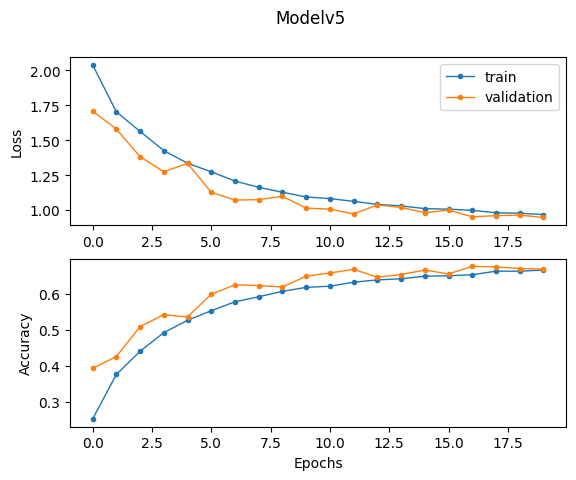

> 66.790


In [ ]:
trainX, trainY, testX, testY = load_dataset()
history_modelv5 = modelv5.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5, 'Modelv5')
_, acc = modelv5.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

## Tercer experimento

In [ ]:
def define_model():
  modelv1 = Sequential()

  modelv1.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
  modelv1.add(MaxPooling2D(pool_size = (2, 2)))

  modelv1.add(Flatten())
  modelv1.add(Dense(128, activation = 'relu'))
  modelv1.add(Dense(10, activation = 'softmax'))

  #modelv1.summary()
  return modelv1

def define_modelv5():
  modelv5 = Sequential()

  modelv5.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
  modelv5.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  modelv5.add(MaxPooling2D(pool_size = (2, 2)))
  modelv5.add(Dropout(0.2))

  modelv5.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
  modelv5.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
  modelv5.add(MaxPooling2D((2, 2)))
  modelv5.add(Dropout(0.2))

  modelv5.add(Flatten())
  modelv5.add(Dense(128, activation = 'relu'))
  modelv5.add(Dropout(0.2))
  modelv5.add(Dense(10, activation = 'softmax'))

  #modelv5.summary()

  return modelv5

### Variación de Learning rate

Epoch 1/20
3125/3125 [==============================] - 12s 4ms/step - loss: 77.3262 - accuracy: 0.1002 - val_loss: 2.3040 - val_accuracy: 0.1001
Epoch 2/20
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3040 - accuracy: 0.0986 - val_loss: 2.3032 - val_accuracy: 0.1003
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3038 - accuracy: 0.1012 - val_loss: 2.3034 - val_accuracy: 0.0999
Epoch 4/20
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3038 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.1001
Epoch 5/20
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3039 - accuracy: 0.0995 - val_loss: 2.3032 - val_accuracy: 0.1002
Epoch 6/20
3125/3125 [==============================] - 10s 3ms/step - loss: 2.3038 - accuracy: 0.1007 - val_loss: 2.3041 - val_accuracy: 0.1003
Epoch 7/20
3125/3125 [==============================] - 11s 3ms/step - loss: 2.3036 - accuracy: 0.0999 - val_loss: 2.3033 - val_a

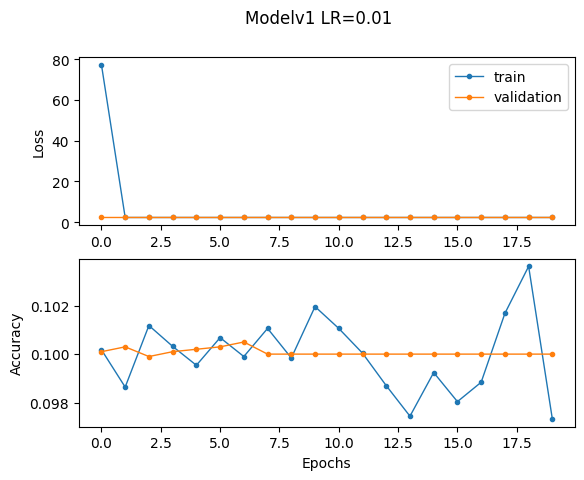

> 10.000


In [ ]:
model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.01, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_model_lr_01 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_model_lr_01, 'Modelv1 LR=0.01')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
3125/3125 [==============================] - 13s 4ms/step - loss: 4408904131359236471914496.0000 - accuracy: 0.0991 - val_loss: 2.3103 - val_accuracy: 0.1000
Epoch 2/20
3125/3125 [==============================] - 11s 3ms/step - loss: 2.3170 - accuracy: 0.0977 - val_loss: 2.3222 - val_accuracy: 0.1000
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3168 - accuracy: 0.1013 - val_loss: 2.3225 - val_accuracy: 0.1000
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3165 - accuracy: 0.1000 - val_loss: 2.3115 - val_accuracy: 0.1000
Epoch 5/20
3125/3125 [==============================] - 10s 3ms/step - loss: 2.3156 - accuracy: 0.1017 - val_loss: 2.3153 - val_accuracy: 0.1000
Epoch 6/20
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3163 - accuracy: 0.1014 - val_loss: 2.3164 - val_accuracy: 0.1000
Epoch 7/20
3125/3125 [==============================] - 11s 3ms/step - loss: 2.3169 - accuracy: 0.0995 - v

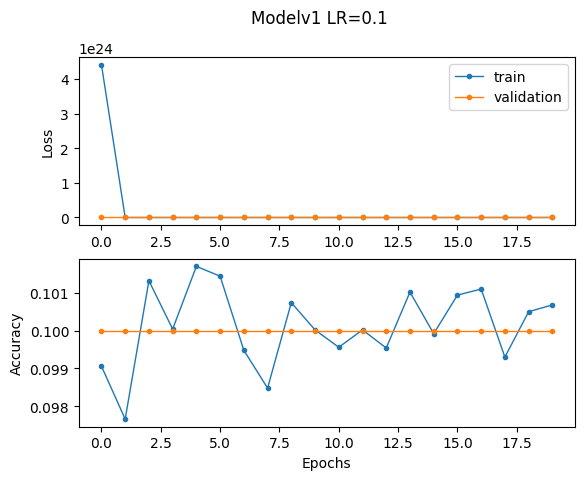

> 10.000


In [ ]:
model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.1, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_model_lr_1 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_model_lr_1, 'Modelv1 LR=0.1')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
3125/3125 [==============================] - 19s 6ms/step - loss: 2.1437 - accuracy: 0.2240 - val_loss: 1.8778 - val_accuracy: 0.3102
Epoch 2/20
3125/3125 [==============================] - 17s 5ms/step - loss: 1.7353 - accuracy: 0.3621 - val_loss: 1.5094 - val_accuracy: 0.4527
Epoch 3/20
3125/3125 [==============================] - 18s 6ms/step - loss: 1.5277 - accuracy: 0.4421 - val_loss: 1.3640 - val_accuracy: 0.5130
Epoch 4/20
3125/3125 [==============================] - 17s 6ms/step - loss: 1.3893 - accuracy: 0.4976 - val_loss: 1.2612 - val_accuracy: 0.5511
Epoch 5/20
3125/3125 [==============================] - 18s 6ms/step - loss: 1.2976 - accuracy: 0.5384 - val_loss: 1.2101 - val_accuracy: 0.5735
Epoch 6/20
3125/3125 [==============================] - 18s 6ms/step - loss: 1.2156 - accuracy: 0.5677 - val_loss: 1.1885 - val_accuracy: 0.5886
Epoch 7/20
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1469 - accuracy: 0.5902 - val_loss: 1.0713 - val_ac

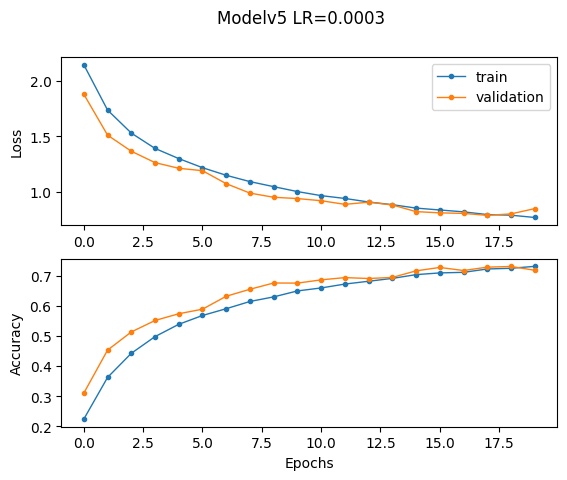

> 71.780


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.0003, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv5_lr_0003 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_lr_0003, 'Modelv5 LR=0.0003')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
3125/3125 [==============================] - 19s 6ms/step - loss: 2.4023 - accuracy: 0.0994 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.3032 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/20
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3032 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.3032 - accuracy: 0.0973 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.3035 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/20
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/20
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.3029 - val_ac

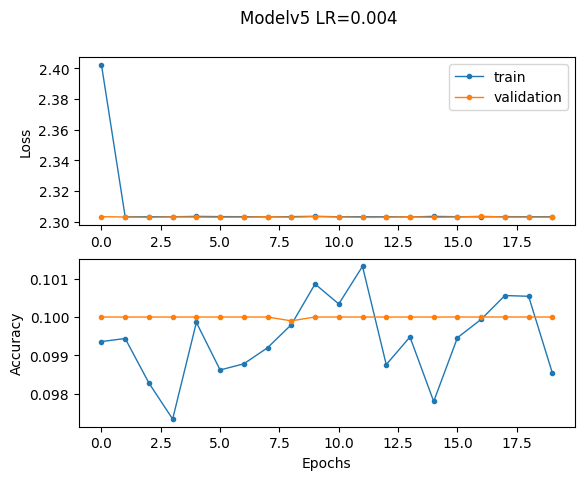

> 10.000


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.004, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv5_lr_004 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_lr_004, 'Modelv5 LR=0.004')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

### Variación de Batch Size

Epoch 1/20
6250/6250 [==============================] - 23s 4ms/step - loss: 2.6341 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
6250/6250 [==============================] - 23s 4ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/20
6250/6250 [==============================] - 24s 4ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 4/20
6250/6250 [==============================] - 24s 4ms/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
6250/6250 [==============================] - 23s 4ms/step - loss: 2.3031 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/20
6250/6250 [==============================] - 25s 4ms/step - loss: 2.3030 - accuracy: 0.0978 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/20
6250/6250 [==============================] - 27s 4ms/step - loss: 2.3029 - accuracy: 0.1003 - val_loss: 2.3027 - val_ac

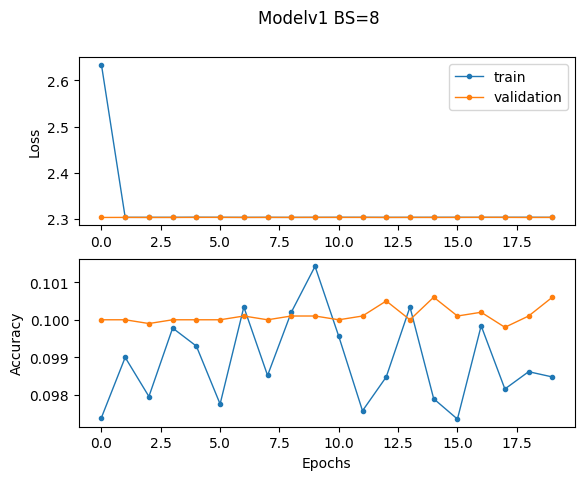

> 10.060


In [ ]:
model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_model_bs_8 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=8,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_model_bs_8, 'Modelv1 BS=8')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 3.2366 - accuracy: 0.0975 - val_loss: 2.3031 - val_accuracy: 0.0998
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.0966 - val_loss: 2.3032 - val_accuracy: 0.1002
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3030 - val_accuracy: 0.1002
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3033 - val_accuracy: 0.0999
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0983 - val_loss: 2.3035 - val_accuracy: 0.1005
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3025 - accuracy: 0.0970 - val_loss: 2.3038 - val_accuracy: 0.0999
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.0977 - val_loss: 2.3037 - val_accuracy:

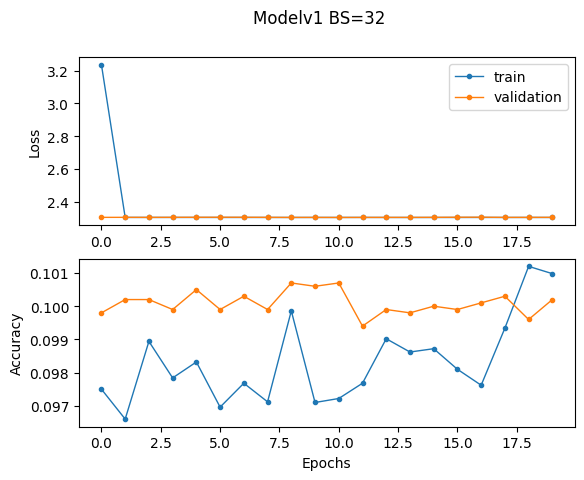

> 10.020


In [ ]:
model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_model_bs_32 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=32,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_model_bs_32, 'Modelv1 BS=32')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.9821 - accuracy: 0.2736 - val_loss: 1.7163 - val_accuracy: 0.3668
Epoch 2/20
6250/6250 [==============================] - 34s 6ms/step - loss: 1.6873 - accuracy: 0.3886 - val_loss: 1.5400 - val_accuracy: 0.4513
Epoch 3/20
6250/6250 [==============================] - 33s 5ms/step - loss: 1.5954 - accuracy: 0.4302 - val_loss: 1.3924 - val_accuracy: 0.5008
Epoch 4/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.5460 - accuracy: 0.4501 - val_loss: 1.3944 - val_accuracy: 0.5066
Epoch 5/20
6250/6250 [==============================] - 31s 5ms/step - loss: 1.4925 - accuracy: 0.4708 - val_loss: 1.3767 - val_accuracy: 0.5178
Epoch 6/20
6250/6250 [==============================] - 32s 5ms/step - loss: 1.4788 - accuracy: 0.4779 - val_loss: 1.3912 - val_accuracy: 0.5083
Epoch 7/20
6250/6250 [==============================] - 31s 5ms/step - loss: 1.4734 - accuracy: 0.4800 - val_loss: 1.3751 - val_ac

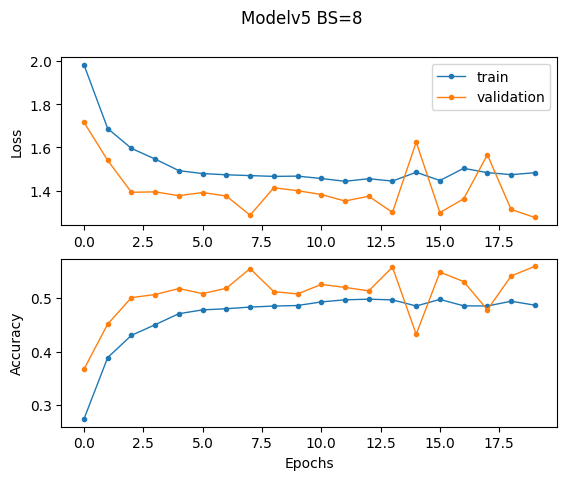

> 55.930


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv5_bs_8 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=8,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_bs_8, 'Modelv5 BS=8')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 2.1245 - accuracy: 0.2259 - val_loss: 1.8360 - val_accuracy: 0.3276
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7185 - accuracy: 0.3663 - val_loss: 1.5924 - val_accuracy: 0.4136
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5530 - accuracy: 0.4383 - val_loss: 1.5005 - val_accuracy: 0.4623
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4311 - accuracy: 0.4881 - val_loss: 1.3747 - val_accuracy: 0.5220
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3343 - accuracy: 0.5268 - val_loss: 1.2037 - val_accuracy: 0.5657
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2730 - accuracy: 0.5513 - val_loss: 1.1498 - val_accuracy: 0.5990
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1981 - accuracy: 0.5781 - val_loss: 1.0787 - val_ac

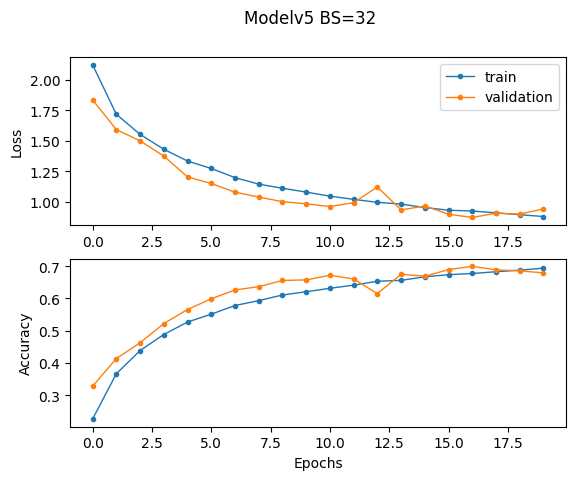

> 67.920


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv5_bs_32 = model.fit(
    trainX,
    trainY,
    epochs=20,
    batch_size=32,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_bs_32, 'Modelv5 BS=32')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

### Variación de épocas

Epoch 1/40
3125/3125 [==============================] - 12s 4ms/step - loss: 2.6614 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/40
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.1004
Epoch 3/40
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3042 - val_accuracy: 0.0994
Epoch 4/40
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 5/40
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 6/40
3125/3125 [==============================] - 11s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 7/40
3125/3125 [==============================] - 11s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_ac

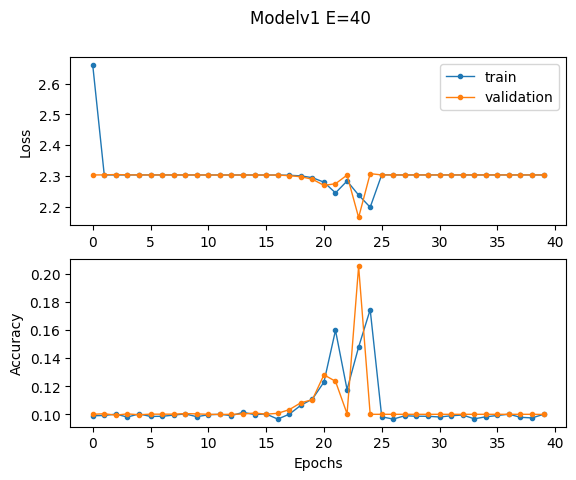

> 9.990


In [ ]:
model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv1_e_40 = model.fit(
    trainX,
    trainY,
    epochs=40,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv1_e_40, 'Modelv1 E=40')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/40
3125/3125 [==============================] - 19s 6ms/step - loss: 1.9851 - accuracy: 0.2699 - val_loss: 1.6554 - val_accuracy: 0.3991
Epoch 2/40
3125/3125 [==============================] - 16s 5ms/step - loss: 1.6240 - accuracy: 0.4089 - val_loss: 1.4196 - val_accuracy: 0.4899
Epoch 3/40
3125/3125 [==============================] - 16s 5ms/step - loss: 1.4707 - accuracy: 0.4742 - val_loss: 1.4047 - val_accuracy: 0.5125
Epoch 4/40
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3463 - accuracy: 0.5193 - val_loss: 1.2932 - val_accuracy: 0.5420
Epoch 5/40
3125/3125 [==============================] - 18s 6ms/step - loss: 1.2731 - accuracy: 0.5487 - val_loss: 1.2268 - val_accuracy: 0.5744
Epoch 6/40
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2217 - accuracy: 0.5682 - val_loss: 1.1690 - val_accuracy: 0.6030
Epoch 7/40
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1715 - accuracy: 0.5875 - val_loss: 1.0675 - val_ac

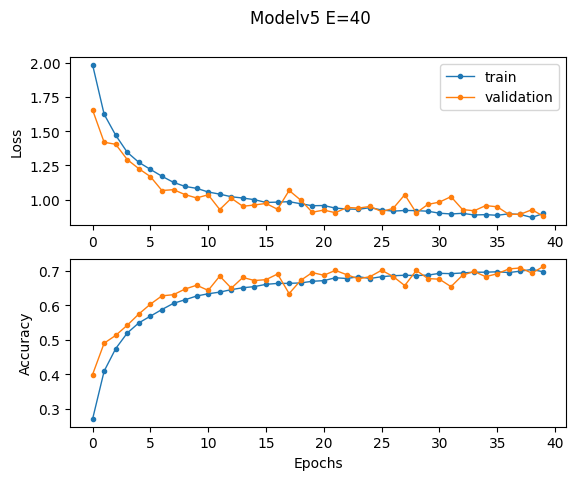

> 71.260


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
history_modelv5_e_40 = model.fit(
    trainX,
    trainY,
    epochs=40,
    batch_size=16,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_e_40, 'Modelv5 E=40')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

## Cuarto experimento

Epoch 1/20


<ipython-input-15-c78580c71bd3>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_modelv1_da = model.fit_generator(


781/781 [==============================] - 31s 39ms/step - loss: 3.7931 - accuracy: 0.0972 - val_loss: 2.3032 - val_accuracy: 0.1004
Epoch 2/20
781/781 [==============================] - 29s 37ms/step - loss: 2.3026 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 3/20
781/781 [==============================] - 28s 36ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1019
Epoch 4/20
781/781 [==============================] - 29s 37ms/step - loss: 2.3024 - accuracy: 0.0964 - val_loss: 2.2998 - val_accuracy: 0.1006
Epoch 5/20
781/781 [==============================] - 30s 38ms/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 6/20
781/781 [==============================] - 29s 37ms/step - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1019
Epoch 7/20
781/781 [==============================] - 28s 35ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1009
Epo

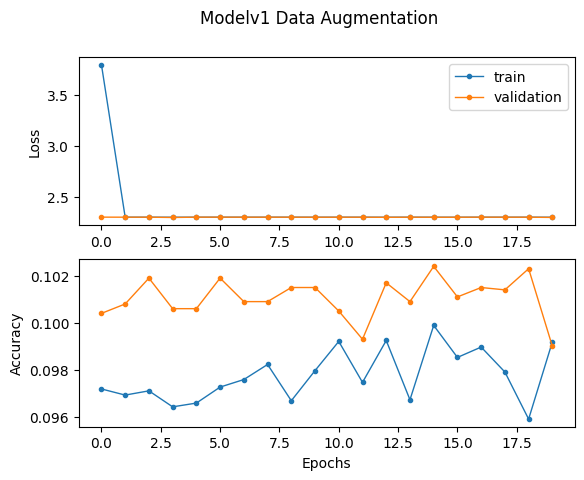

> 9.900


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model = define_model()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)
history_modelv1_da = model.fit_generator(
    it_train,
    steps_per_epoch=steps,
    epochs=20,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv1_da, 'Modelv1 Data Augmentation')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20


<ipython-input-16-f509f5428dfb>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_modelv5_da = model.fit_generator(


781/781 [==============================] - 34s 41ms/step - loss: 2.2816 - accuracy: 0.1575 - val_loss: 1.9430 - val_accuracy: 0.2635
Epoch 2/20
781/781 [==============================] - 33s 42ms/step - loss: 1.8696 - accuracy: 0.2966 - val_loss: 1.6087 - val_accuracy: 0.4031
Epoch 3/20
781/781 [==============================] - 32s 41ms/step - loss: 1.6675 - accuracy: 0.3813 - val_loss: 1.4947 - val_accuracy: 0.4593
Epoch 4/20
781/781 [==============================] - 31s 39ms/step - loss: 1.5675 - accuracy: 0.4228 - val_loss: 1.4227 - val_accuracy: 0.4822
Epoch 5/20
781/781 [==============================] - 32s 41ms/step - loss: 1.4855 - accuracy: 0.4605 - val_loss: 1.3501 - val_accuracy: 0.5117
Epoch 6/20
781/781 [==============================] - 31s 39ms/step - loss: 1.4162 - accuracy: 0.4866 - val_loss: 1.2462 - val_accuracy: 0.5543
Epoch 7/20
781/781 [==============================] - 31s 39ms/step - loss: 1.3572 - accuracy: 0.5078 - val_loss: 1.2067 - val_accuracy: 0.5707
Epo

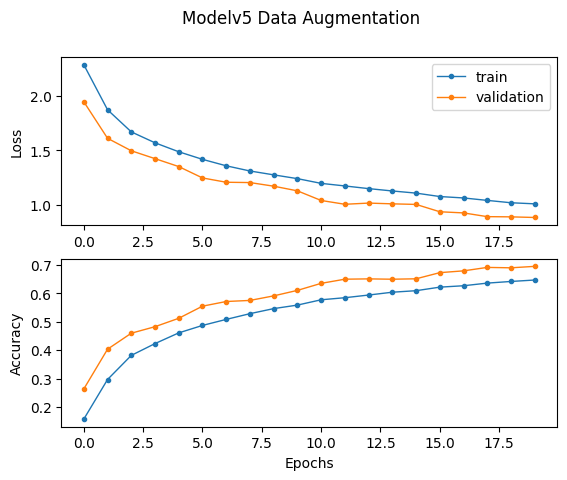

> 69.420


In [ ]:
model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
it_train = datagen.flow(trainX, trainY, batch_size=64)
steps = int(trainX.shape[0] / 64)
history_modelv5_da = model.fit_generator(
    it_train,
    steps_per_epoch=steps,
    epochs=20,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv5_da, 'Modelv5 Data Augmentation')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

## Quinto experimento: combinación de mejores resultados (no considerado para el reporte)

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50


<ipython-input-4-e47befa8a180>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_modelv6 = model.fit_generator(


1562/1562 [==============================] - 41s 23ms/step - loss: 2.1259 - accuracy: 0.2290 - val_loss: 1.7260 - val_accuracy: 0.3867
Epoch 2/50
1562/1562 [==============================] - 37s 23ms/step - loss: 1.7360 - accuracy: 0.3540 - val_loss: 1.5486 - val_accuracy: 0.4382
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.6303 - accuracy: 0.3980 - val_loss: 1.4352 - val_accuracy: 0.4804
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 1.5505 - accuracy: 0.4300 - val_loss: 1.4208 - val_accuracy: 0.4846
Epoch 5/50
1562/1562 [==============================] - 33s 21ms/step - loss: 1.4866 - accuracy: 0.4577 - val_loss: 1.4054 - val_accuracy: 0.4995
Epoch 6/50
1562/1562 [==============================] - 35s 22ms/step - loss: 1.4296 - accuracy: 0.4805 - val_loss: 1.3138 - val_accuracy: 0.5248
Epoch 7/50
1562/1562 [==============================] - 35s 22ms/step - loss: 1.3820 - accuracy: 0.5000 - val_loss: 1.2366 - val_accura

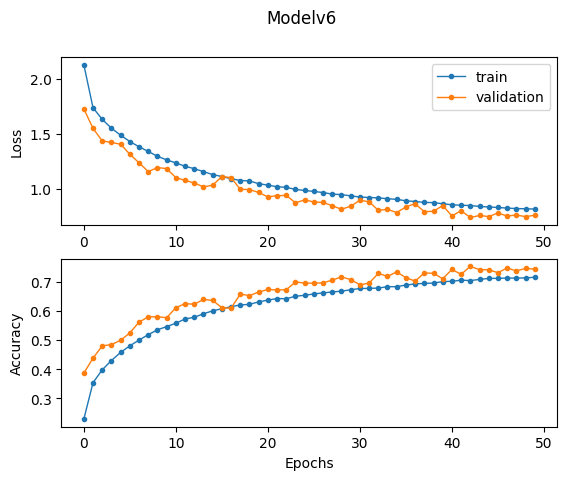

> 74.340


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

model = define_modelv5()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(learning_rate=0.0003, momentum=0.9),
    metrics = ['accuracy']
)

trainX, trainY, testX, testY = load_dataset()
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
it_train = datagen.flow(trainX, trainY, batch_size=32)
steps = int(trainX.shape[0] / 32)
history_modelv6 = model.fit_generator(
    it_train,
    steps_per_epoch=steps,
    epochs=50,
    validation_data=(testX, testY),
    verbose=1)
plot_history(history_modelv6, 'Modelv6')
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))